In [1]:
using DifferentialEquations
using BoundaryValueDiffEq
using OrdinaryDiffEq
using Plots

┌ Info: Recompiling stale cache file C:\Users\pande\.julia\compiled\v1.0\DifferentialEquations\UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\pande\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


In [2]:
const g = 9.81
L = 1.0
timespan = (0.0,pi/2)
function simplependulum!(dT,T,p,x)
    dT[1] = T[2]
    dT[2] = -(g/L)*sin(T[1])
end

function bc1!(residual, T, p, x)
    residual[1] = T[end÷2][1] + pi/2 # the solution at the middle of the time span should be -pi/2
    residual[2] = T[end][2] - pi/2 # the solution at the end of the time span should be pi/2
end
bvp1 = BVProblem(simplependulum!, bc1!, [pi/2,pi/2], timespan)
sol1 = solve(bvp1, Shooting(Vern7()))

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 8-element Array{Float64,1}:
 0.0                
 0.1544635947457568 
 0.47715519070107293
 0.7156711089788074 
 1.008092822446005  
 1.269753176681969  
 1.5707760645118907 
 1.5707963267948966 
u: 8-element Array{Array{Float64,1},1}:
 [1.46327, 1.4765]    
 [1.57452, -0.0371528]
 [1.05631, -3.11917]  
 [0.1218, -4.42143]   
 [-1.05301, -3.12812] 
 [-1.55329, -0.646141]
 [-1.30395, 2.29077]  
 [-1.30391, 2.29096]  

In [6]:
sol1(0.1544635947457568)[2]

-0.03715281063188058

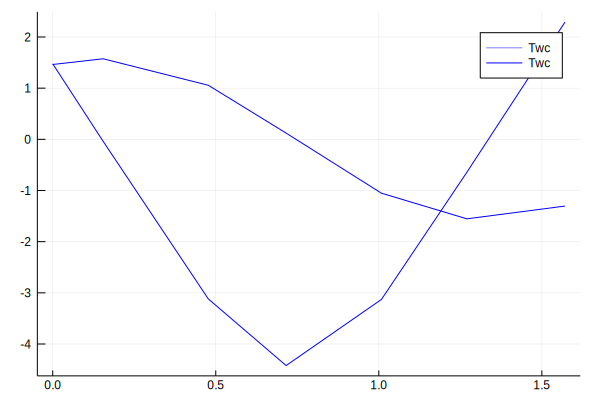

In [43]:
plot(1,1,lc=:blue,la=0.5,label="Twc")
plot!(1,1,lc=:blue,label="Twc")
plot!(sol1.t,[sol1.u[i][1] for i in 1:length(sol1.t)],lc=:blue,label="")
plot!(sol1.t,[sol1.u[i][2] for i in 1:length(sol1.t)],lc=:blue, label="")

In [8]:
using DifferentialEquations
using BoundaryValueDiffEq
using OrdinaryDiffEq
using Plots
pyplot();
using LaTeXStrings;
#parameters for BVProblem
#p=[UP,mda,mdw,aa,ba,aw,bw,chpa,chpw]
plot(1,1,lc=:red,la=1,lw=2,label=L"$T_a^\mathrm{c}$")
plot!(1,1,lc=:blue,la=0.4,lw=2,label=L"$T_w^\mathrm{h}$")
p=[44.4,49.2,53.9,3.42,1.21e-04,3.86,4.01e-04,1.15,4.2]
#length span of heat exchanger
xspan=(0.0,1.)
function heatExchanger!(dT,T,p,time)
    dT[1]=p[1]/(p[2]*(p[8]))*(T[2]-T[1])
    dT[2]=p[1]/(p[3]*(p[9]))*(T[2]-T[1])
end

##initialGuess=[Tah,Twh]
initialGuess=[42.27,3.8]
function bc!(residual,T,p,time)
    residual[1]=T[1][1]-42.27#Tah
    residual[2]=T[end][2]-3.8#Twc
    #residual[3]=T[1][3]+1125.64#Twc
end

bvp=BVProblem(heatExchanger!,bc!,initialGuess,xspan,p)
sol=solve(bvp, Shooting(Vern7()))


retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 4-element Array{Float64,1}:
 0.0                
 0.20363667022555598
 0.916859996497492  
 1.0                
u: 4-element Array{Array{Float64,1},1}:
 [42.27, 8.76673]  
 [37.2246, 7.50571]
 [23.6414, 4.1108] 
 [22.3978, 3.8]    

In [17]:
sol.u[1]


2-element Array{Float64,1}:
 42.27             
  8.766730734089151

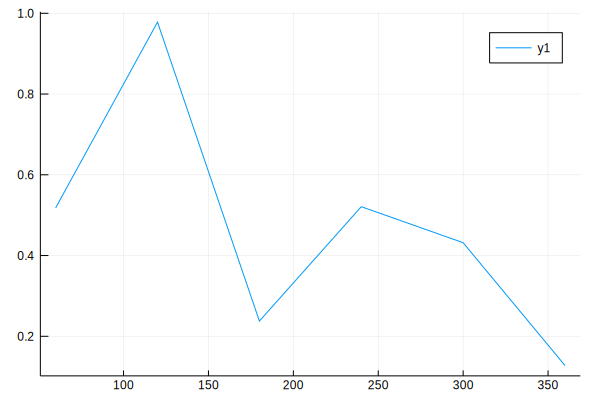

In [27]:
plot(x,y)